In [13]:
from getdist import plots,loadMCSamples
import matplotlib.pyplot as plt
plt.style.use('Minh_paper_style')
import matplotlib
import matplotlib.cm
from matplotlib.ticker import (FixedLocator, MultipleLocator, FixedFormatter, FormatStrFormatter,
                               AutoMinorLocator)

fig_path=r'/cobra/u/minh/Beyond2ptMock/results/figs/'
analysis_settings_default = {'ignore_rows': '0.3', 'converge_test_limit': '0.95'}
analysis_settings_alternative = {'ignore_rows': '0.1', 'converge_test_limit': '0.95',\
                                 'smooth_scale_1D': '0.7', 'smooth_scale_2D': '0.9'}
analysis_settings=[analysis_settings_default,analysis_settings_alternative]
g=plots.get_single_plotter(analysis_settings=analysis_settings_default)
g.settings.figure_legend_frame = False
g.settings.legend_colored_text = True
g.settings.alpha_filled_add=1.0
g.settings.norm_1d_density=True
g.settings.title_limit_fontsize=24
g.settings.legend_fontsize=18
g.settings.legend_frame=False
g.settings.legend_frac_subplot_margin=0.0
g.settings.axes_fontsize=18
g.settings.axes_labelsize=18
cmap=matplotlib.cm.get_cmap('viridis')
g.settings.colormap_scatter=cmap
redpink='#f1006d'

<Figure size 600x450 with 0 Axes>

In [94]:
#chain_param_path='/ptmp/minh/lefty_challenge/flatLCDM/all_boxes_concatenated/'
chain_param_path='/ptmp/minh/lefty_challenge/flatLCDM/box1/sampling_bO_shat/Eulerian_NUFFT/twolptsecond_nufft/'
#chain_param_path='/ptmp/minh/lefty_challenge/flatLCDM/box1/sampling_bO/Eulerian_NUFFT/'

#chain_prefix=['sampling_bO_shat_2lptsecond_nufft_FOURIER_NGEul1024_L0.14_cube_logP_params_including_As_sigma8z']
chain_prefix=['chain1a/sampling_bO_shat_2lptsecond_nufft_FOURIER_NGEul1024_L0.14_cube_logP_params',\
              'chain2a/sampling_bO_shat_2lptsecond_nufft_FOURIER_NGEul1024_L0.14_cube_logP_params']

#chain_prefix=['twolptsecond_nufft/kmax014/chain1_fixed_highsigma_CLASS_largestep/sampling_bO_2lptsecond_nufft_FOURIER_NGEul1024_L0.196_cube_fixed_highsigma_CLASS_largestep_logP_params',\
              #'twolptsecond_nufft/kmax014/chain2_fixed_highsigma_CLASS_largestep/sampling_bO_2lptsecond_nufft_FOURIER_NGEul1024_L0.196_cube_fixed_highsigma_CLASS_largestep_logP_params']
#chain_prefix=['twolptthird_nufft/chain1_fixed_highsigma_CLASS_largestep/sampling_bO_2lptthird_nufft_FOURIER_NGEul1024_L0.14_cube_fixed_highsigma_CLASS_largestep_logP_params',\
              #'twolptthird_nufft/chain2_fixed_highsigma_CLASS_largestep/sampling_bO_2lptthird_nufft_FOURIER_NGEul1024_L0.14_cube_fixed_highsigma_CLASS_largestep_logP_params']

#chain_prefix=['twolptthird_nufft/kmax0125/chain1_fixed_highsigma_CLASS_largestep/sampling_bO_2lptthird_nufft_FOURIER_NGEul1024_L0.175_cube_fixed_highsigma_CLASS_largestep_logP_params',\
              #'twolptthird_nufft/kmax0125/chain2_fixed_highsigma_CLASS_largestep/sampling_bO_2lptthird_nufft_FOURIER_NGEul1024_L0.175_cube_fixed_highsigma_CLASS_largestep_logP_params']
#chain_prefix=['twolptthird_nufft/chain1_fixed_highsigma_CLASS_largestep/sampling_bO_2lptthird_nufft_FOURIER_NGEul1024_L0.14_cube_fixed_highsigma_CLASS_largestep_logP_params',\
              #'twolptthird_nufft/chain1_fixed_highsigma_CLASS_Ocdmb_largestep/sampling_bO_2lptthird_nufft_FOURIER_NGEul1024_L0.14_cube_fixed_highsigma_CLASS_Ocdmb_largestep_logP_params',\
              #'twolptthird_nufft/chain1_fixed_highsigma_CLASS_nonu_largestep/sampling_bO_2lptthird_nufft_FOURIER_NGEul1024_L0.14_cube_fixed_highsigma_CLASS_nonu_largestep_logP_params']

freeic_chains=[]
#fixedic_chains=[]
for chain in chain_prefix:
    #fixedic_chains.append(loadMCSamples(chain_param_path+chain,settings=analysis_settings[1]));
    freeic_chains.append(loadMCSamples(chain_param_path+chain,settings=analysis_settings[0]));
#fixedic_chains.append(loadMCSamples(chain_param_path+chain_prefix[0],settings=analysis_settings[0]));
#fixedic_chains.append(loadMCSamples(chain_param_path+chain_prefix[1],settings=analysis_settings[1]));

In [95]:
convergence_test=freeic_chains[0].getConvergeTests(feedback=True)
#convergence_test=fixedic_chains[0].getConvergeTests(feedback=True)

RL: Thin for Markov:  16
RL: Thin for indep samples:   41
RL: Estimated burn in steps:  192  ( 192  rows)


In [96]:
print(convergence_test)

Parameter autocorrelation lengths (effective number of samples N_eff = tot weight/weight length)

                Weight Length   Sample length           N_eff
alpha                1.17E+02          116.92             171
b_K2                 4.00E+01           39.98             502
b_delta              1.07E+02          107.17             187
b_delta2             1.17E+02          117.05             171
b_lapl(delta)        1.00E+00            1.00           20089

Split tests: rms_n([delta(upper/lower quantile)]/sd) n={2,3,4}, limit=95%:
i.e. mean sample splitting change in the quantiles in units of the st. dev.

alpha            0.1383   0.2301   0.1924 upper
alpha            0.2680   0.3309   0.3768 lower
b_K2             0.0825   0.0368   0.1078 upper
b_K2             0.0021   0.0779   0.1141 lower
b_delta          0.2720   0.3060   0.3692 upper
b_delta          0.1342   0.2152   0.1817 lower
b_delta2         0.2777   0.3554   0.4318 upper
b_delta2         0.0945   0.1486   0.1296

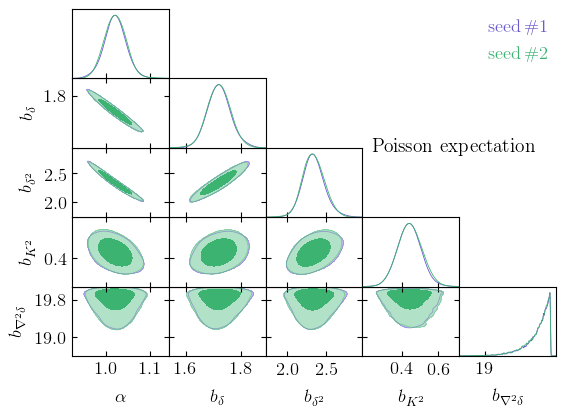

In [97]:
param_list = ['alpha','b_delta','b_delta2','b_K2','b_lapl(delta)']
#param_list = ['alpha','b_delta','b_delta2','b_K2','b_lapl_delta','sigma']
#labels=['$\hat{s}=\hat{s}_{\mathrm{true}}$','Free $\hat{s}$']
#g.triangle_plot([fixedic_chains,freeic_trueicinit_chains],contour_colors=['royalblue','orangered'],params=param_list,colorbar=False,legend_ncol=1,legend_loc='upper right',legend_labels=labels,filled=True,shaded=False,alpha=0.25)
#labels=['random\_init','true\_init']
#labels=['fixed $\sigma$','free $\sigma$']
labels=['seed\,\#1','seed\,\#2']
#labels=[['default'],[r'smoother']]
#labels=[r'$k_{\mathrm{max}}=0.10$',r'$k_{\mathrm{max}}=0.15$']
#labels=[r'2nd-order',r'3rd-order']
#labels=[r'$m_nu=0.06,\Omega_{c+b+\nu}$',r'$m_nu=0.06,\Omega_{c+b}$','$m_nu=0.0$']
g.triangle_plot(freeic_chains,contour_colors=['slateblue','mediumseagreen'],params=param_list,colorbar=False,legend_ncol=1,legend_loc='upper right',legend_labels=labels,filled=True,shaded=False,alpha=[1.0,1.0])
#g.triangle_plot(fixedic_chains,contour_colors=['slateblue','mediumseagreen'],params=param_list,colorbar=False,legend_ncol=1,legend_loc='upper right',legend_labels=labels,filled=True,shaded=False,alpha=[1.0,1.0])
#g.triangle_plot(fixedic_chains,contour_colors=['slateblue','mediumseagreen','deeppink'],params=param_list,colorbar=False,legend_ncol=1,legend_loc='upper right',legend_labels=labels,filled=True,shaded=False,alpha=[1.0,1.0])
#g.add_text(r'twolptthird\_nufft'+'\n'+'$[k_{\mathrm{max}},\Lambda]=[0.15,0.21]h$Mpc$^{-1}$'+'\n'+'box-1',0.75, 3.5, color='k',fontsize=14)
g.add_text(r'Poisson expectation',0.8, 3., color='k',fontsize=14)
g.fig.set_facecolor('white')
#for ax in g.subplots[:,0]:
        #ax.set_yticks([])
#for ax in g.subplots[-1,:]:
        #ax.set_xticks([])
#fig_name='fixedICs_box1_twolptthird_nufft_lambda021_kmax015_chain1-2_fixed_vs_free_sigma.pdf'
#g.fig.savefig(fig_path+fig_name)

In [98]:
As_fid=1.5e-9
#As_fid=2.1e-9
for c,chain in enumerate(freeic_chains):
#for c,chain in enumerate(fixedic_chains):
    p=chain.getParams()
    chain.addDerived((p.alpha**2)*As_fid, name='A_s', label='A_s')
    chain.saveAsText(chain_param_path+chain_prefix[c]+'_including_As',chain_index=c)

In [99]:
print(chain_param_path+chain.getName()+'_including_As')

/ptmp/minh/lefty_challenge/flatLCDM/box1/sampling_bO_shat/Eulerian_NUFFT/twolptsecond_nufft/sampling_bO_shat_2lptsecond_nufft_FOURIER_NGEul1024_L0.14_cube_logP_params_including_As


In [100]:
chain1_freeic_highsigma_margstats=freeic_chains[0].getMargeStats()
alpha_mean=freeic_chains[0].getMeans()[0]
alpha_std=freeic_chains[0].std(0)
alpha_lims=chain1_freeic_highsigma_margstats.parWithName('alpha').limits
print("Sample mean alpha:")
print(alpha_mean)
print("Sample std. alpha:")
print(alpha_std)
for conf, lim in zip(freeic_chains[0].contours,alpha_lims):
    print('x0 %s%% lower: %.3f upper: %.3f (%s)'%(conf, lim.lower, lim.upper, lim.limitType()))
As_mean=freeic_chains[0].getMeans()[-1]
As_std=freeic_chains[0].std(5)
As_lims=chain1_freeic_highsigma_margstats.parWithName('A_s').limits
print("Sample mean A_s:")
print(As_mean)
print("Sample std. A_s:")
print(As_std)
for conf, lim in zip(freeic_chains[0].contours,As_lims):
    print('x0 %s%% lower: %.3f upper: %.3f (%s)'%(conf, lim.lower, lim.upper, lim.limitType()))

Sample mean alpha:
1.020042850722093
Sample std. alpha:
0.025027940993523047
x0 0.68% lower: 0.997 upper: 1.044 (two tail)
x0 0.95% lower: 0.969 upper: 1.070 (two tail)
x0 0.99% lower: 0.951 upper: 1.088 (two tail)
Sample mean A_s:
1.5616707227094441e-09
Sample std. A_s:
7.660621975494426e-11
x0 0.68% lower: 0.000 upper: 0.000 (two tail)
x0 0.95% lower: 0.000 upper: 0.000 (two tail)
x0 0.99% lower: 0.000 upper: 0.000 (two tail)


In [101]:
chain1_freeic_highsigma_margstats=freeic_chains[1].getMargeStats()
alpha_mean=freeic_chains[1].getMeans()[0]
alpha_std=freeic_chains[1].std(0)
alpha_lims=chain1_freeic_highsigma_margstats.parWithName('alpha').limits
print("Sample mean alpha:")
print(alpha_mean)
print("Sample std. alpha:")
print(alpha_std)
for conf, lim in zip(freeic_chains[1].contours,alpha_lims):
    print('x0 %s%% lower: %.3f upper: %.3f (%s)'%(conf, lim.lower, lim.upper, lim.limitType()))
As_mean=freeic_chains[1].getMeans()[-1]
As_std=freeic_chains[1].std(5)
As_lims=chain1_freeic_highsigma_margstats.parWithName('A_s').limits
print("Sample mean A_s:")
print(As_mean)
print("Sample std. A_s:")
print(As_std)
for conf, lim in zip(freeic_chains[1].contours,As_lims):
    print('x0 %s%% lower: %.3f upper: %.3f (%s)'%(conf, lim.lower, lim.upper, lim.limitType()))

Sample mean alpha:
1.020300143420638
Sample std. alpha:
0.025027194990983347
x0 0.68% lower: 0.995 upper: 1.045 (two tail)
x0 0.95% lower: 0.973 upper: 1.067 (two tail)
x0 0.99% lower: 0.959 upper: 1.098 (two tail)
Sample mean A_s:
1.5624581147299358e-09
Sample std. A_s:
7.682581236186814e-11
x0 0.68% lower: 0.000 upper: 0.000 (two tail)
x0 0.95% lower: 0.000 upper: 0.000 (two tail)
x0 0.99% lower: 0.000 upper: 0.000 (two tail)


In [102]:
print(np.argmin(freeic_chains[0].loglikes))
print(np.min(freeic_chains[0].loglikes))
print(np.argmin(freeic_chains[1].loglikes))
print(np.min(freeic_chains[1].loglikes))

10614
-441671.7287000556
13409
-441534.36260676297


In [103]:
p=freeic_chains[0].getParams()
p.alpha[np.argmin(freeic_chains[0].loglikes)]

1.0345075126431311